# Analyzing and Visualizing Communication Skills of Doctors and Nurses as Evaluated by Hospital Patients

Everyday, many people are interacting with healthcare professionals. Health informatics is extremely important in these interactions. The distribution, clarity, and response of health information influences both health professionals and patients and how they take action in their health related behaviors. In order for patients to take the best actions possible to understand and improve their health, healthcare professionals have to be effective communicators as they are one of the main sources to relay important health information.

### The Dataset

This dataset is provided by the Centers for Medicare and Medicaid Services. It contains a list of hospital ratings for the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS). The dataset can be found [here](https://catalog.data.gov/dataset/patient-survey-hcahps-hospital).

Lets Begin!

In [1]:
#Import the packages we need

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
#Read in the dataset
hp_communication = pd.read_csv("Patient_survey__HCAHPS__-_Hospital.csv")

C:\Users\Jagui\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12,14,17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
hp_communication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455328 entries, 0 to 455327
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Facility ID                            455328 non-null  object
 1   Facility Name                          455328 non-null  object
 2   Address                                455328 non-null  object
 3   City                                   455328 non-null  object
 4   State                                  455328 non-null  object
 5   ZIP Code                               455328 non-null  int64 
 6   County Name                            455328 non-null  object
 7   Phone Number                           455328 non-null  object
 8   HCAHPS Measure ID                      455328 non-null  object
 9   HCAHPS Question                        455328 non-null  object
 10  HCAHPS Answer Description              455328 non-null  object
 11  

It looks like we have a lot of columns! Many of which seems to be strings. There are 455,328 rows in our dataset, but not every column is filled out for every row. There are many relevant columns to choose from, lets take a further look into our dataset.

In [4]:
hp_communication.head(3)

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date,Location
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_DOCTOR_LISTEN_U_P,"Patients who reported that their doctors ""Usua...",...,14,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,POINT (-85.361725 31.214058)
1,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,H_COMP_3_STAR_RATING,Staff responsiveness - star rating,...,Not Applicable,NaN,Not Applicable,1053,NaN,34,NaN,07/01/2018,06/30/2019,NaN
2,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,H_QUIET_HSP_A_P,Patients who reported that the area around the...,...,64,NaN,Not Applicable,1053,NaN,34,NaN,07/01/2018,06/30/2019,NaN


I think the first step in our data preparation is to trim our data by columns that are found relevant for this project. And then we can drop NA rows within that smaller dataset so that any unnecessary trimming can be avoided.

### What Columns Should We Keep?

#### FacilityName, Address, City, State, ZIP Code
All of these columns provide useful location data that will help us analyze facilities at a high level such as state, down to lower levels such as the zipcodes within a city. This kind of geographic data can easily be used in Tableau to build comprehensive maps and plot individual facilities and the communication skills of healthcare professionals.

#### HCAHPS Measure ID, HCAHPS Question, HCAHPS Answer Percent
These columns give us information on the survey questions. HCAHPS Measure ID correlates to a specific question being asked, HCAHPS Question is the statement/question being asked, and HCAHPS Answer Percent is the percentage of respondents that agree with that specific statement. It seems that a statement regarding communication effectiveness would be asked up to four times. Where you could agree with whether the statement "always" "sometimes or never" happens.

#### Number of completed surveys

This is important so that we can analyze the distribution of survey responses received for a question, this will help us identify any observations where lack of responses may influence the result too much.

Now that we have our columns of interest, lets subset and clean this dataset.


In [5]:
#subset
relevant_columns = ["Facility Name","Address", "City", "State", "ZIP Code", 
                    "HCAHPS Measure ID", "HCAHPS Question", "HCAHPS Answer Percent",
                   "Number of Completed Surveys",]
hp_comm_clean = hp_communication[relevant_columns]

#monitor the number of rows dropped
rows_before = len(hp_comm_clean.index)
hp_comm_clean = hp_comm_clean.dropna()
rows_after = len(hp_comm_clean.index)
print("Before dropping NA values we had", rows_before, 
      " rows. We now have ", rows_after, "rows. The difference is "
      , rows_before - rows_after)

Before dropping NA values we had 455328  rows. We now have  455328 rows. The difference is  0


Because all of our relevant columns had 0 null values, no rows were dropped during the df.dropna() method was used. If we were to use this method prior to subsetting, we could expect a lot of rows being removed if no conditions were entered.

### Renaming our columns

Our column titles contain spaces and capital letters, which can make it difficult to write code about. Lets change our column titles to snake case.

In [6]:
#replace capital letters with lower case lowers 
df_columns_clean = []
for i in hp_comm_clean.columns:
    i = i.replace(" ", "_")
    i = i.lower()
    df_columns_clean.append(i)

hp_comm_clean.columns = df_columns_clean
print(hp_comm_clean.columns)

Index(['facility_name', 'address', 'city', 'state', 'zip_code',
       'hcahps_measure_id', 'hcahps_question', 'hcahps_answer_percent',
       'number_of_completed_surveys'],
      dtype='object')


This will make our code much easier to work on as we wont have to worry about capitalization and spacing

### Lets take a look at our new dataset

In [7]:
hp_comm_clean.head(4)

,facility_name,address,city,state,zip_code,hcahps_measure_id,hcahps_question,hcahps_answer_percent,number_of_completed_surveys
0,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,H_DOCTOR_LISTEN_U_P,"Patients who reported that their doctors ""Usua...",14,535
1,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,H_COMP_3_STAR_RATING,Staff responsiveness - star rating,Not Applicable,1053
2,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,H_QUIET_HSP_A_P,Patients who reported that the area around the...,64,1053
3,ST. VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,H_COMP_2_STAR_RATING,Doctor communication - star rating,Not Applicable,2162


It seems more cleaning is needed! Our df.dropna() method did not catch any "Not Applicable" entries to the hcahps_answer_percent row. It appears that star rating and linear mean value questions give this row a value of "Not Applicable" Lets fix this.

In [8]:
#Create a boolean matrix of rows where "Not Applicable" is not a value, then inject into dataset to clean
hp_comm_clean = hp_comm_clean[hp_comm_clean["hcahps_answer_percent"]!= "Not Applicable"]
hp_comm_clean = hp_comm_clean[hp_comm_clean["hcahps_answer_percent"]!= "Not Available"]


hp_comm_clean.head(4)

,facility_name,address,city,state,zip_code,hcahps_measure_id,hcahps_question,hcahps_answer_percent,number_of_completed_surveys
0,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,H_DOCTOR_LISTEN_U_P,"Patients who reported that their doctors ""Usua...",14,535
2,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,H_QUIET_HSP_A_P,Patients who reported that the area around the...,64,1053
5,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,H_DOCTOR_LISTEN_U_P,"Patients who reported that their doctors ""Usua...",17,389
9,CALLAHAN EYE HOSPITAL,"1720 UNIVERSITY BLVD, SUITE 500",BIRMINGHAM,AL,35233,H_COMP_5_U_P,"Patients who reported that staff ""Usually"" exp...",16,34


## A Deeper Explanation of The Kind of Questions We Are Looking At

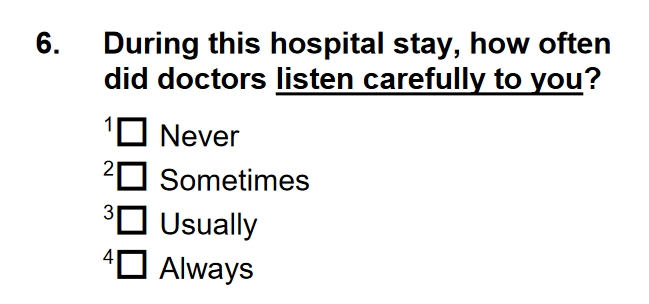

Here is an example of the kind of questions we are looking at from the HCAHPS survey. Respondents are to select one option. Each response of every question has a specific hcahps_measure_id and hcahps_question. The hcahps_answer_percent means the percentage of respondents that selected that specific option. 

Lets look at our third row of our data frame

In [9]:
hp_comm_clean.iloc[2]

facility_name                                     DEKALB REGIONAL MEDICAL CENTER
address                                                     200 MED CENTER DRIVE
city                                                                  FORT PAYNE
state                                                                         AL
zip_code                                                                   35968
hcahps_measure_id                                            H_DOCTOR_LISTEN_U_P
hcahps_question                Patients who reported that their doctors "Usua...
hcahps_answer_percent                                                         17
number_of_completed_surveys                                                  389
Name: 5, dtype: object

This is our example question in use. This row is specific to the percentage respondents that answered "Usually" to our example question above. What this means is: Out of our 389 responses to this question at Dekalb Regional Medical Center, 17 percent of our respondents felt that doctors "Usually" listen to them during their hospital stay.

If you add up the percentages of all the answer options, it should add up to 100 percent.

Because this dataframe and project seem to be heavily reliant on the hcahps_id variable, we have to make sure we understand the values contained within them.

In [10]:
id_values = hp_comm_clean["hcahps_measure_id"].value_counts()
print(id_values)

H_HSP_RATING_9_10       4211
H_COMP_7_D_SD           4211
H_CLEAN_HSP_A_P         4211
H_COMP_3_U_P            4211
H_COMP_2_A_P            4211
                        ... 
H_CT_PREFER_A           3915
H_CALL_BUTTON_SN_P      3915
H_SIDE_EFFECTS_SN_P     3915
H_BATH_HELP_SN_P        3915
H_DOCTOR_LISTEN_SN_P    3915
Name: hcahps_measure_id, Length: 72, dtype: int64


Here we see that we have 72 different unique ids. It will be important to create a function where we can efficiently capture the response ranges for each question we aim to examine. Before that, lets determine the level we want to analyze the data. I think it would be a good idea to start at a general national level, then focus on my state of Maryland.

Lets group our dataframe by state so we can compare scores accross the country. After that, lets extract Maryland data so that we can look at that at a zipcode level later.

In [11]:
hp_grouped = hp_comm_clean.groupby("state")
hp_md = hp_grouped.get_group("MD")
hp_md.head()

,facility_name,address,city,state,zip_code,hcahps_measure_id,hcahps_question,hcahps_answer_percent,number_of_completed_surveys
1428,UNION HOSPITAL OF CECIL COUNTY,106 BOW STREET,ELKTON,MD,21921,H_COMP_2_U_P,"Patients who reported that their doctors ""Usua...",24,526
1477,CARROLL HOSPITAL CENTER,200 MEMORIAL AVENUE,WESTMINSTER,MD,21157,H_DOCTOR_LISTEN_U_P,"Patients who reported that their doctors ""Usua...",21,675
1498,HOLY CROSS HOSPITAL,1500 FOREST GLEN ROAD,SILVER SPRING,MD,20910,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,12,4436
1501,MEDSTAR UNION MEMORIAL HOSPITAL,201 EAST UNIVERSITY PARKWAY,BALTIMORE,MD,21218,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,20,850
1508,GREATER BALTIMORE MEDICAL CENTER,6701 NORTH CHARLES STREET,BALTIMORE,MD,21204,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",17,408


### Extracting and Analyzing our First Question: How often did Doctors listen to Hospital Patients?

Lets use the question we have an image of and analyze how hospital patients evaluate their doctor's listening skills across the 50 States. The id for patients who said "Always" is "H_DOCTOR_LISTEN_A_P"

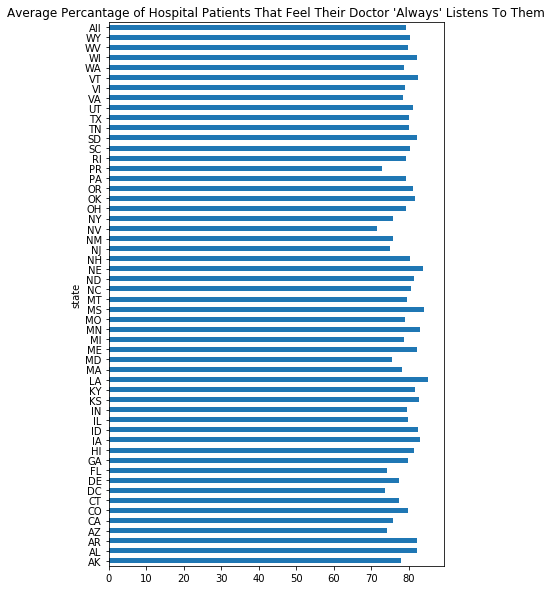

In [12]:
#change hcahps_answer_percent to int
hp_comm_clean["hcahps_answer_percent"] = hp_comm_clean["hcahps_answer_percent"].astype(int)

#First: Lets extract all rows with the relevant id

hp_doctor_listen_always = hp_comm_clean[hp_comm_clean["hcahps_measure_id"]=="H_DOCTOR_LISTEN_A_P"]

#Pivot Table with state as index
hp_doc_listen_always_pv = hp_doctor_listen_always.pivot_table(values = "hcahps_answer_percent", 
                                                                index = "state", 
                                                                margins = True,
                                                               aggfunc = np.mean)

hp_doc_listen_always_pv.plot(kind = "barh", 
                             figsize = (6,10), 
                             title = "Average Percantage of Hospital Patients That Feel Their Doctor 'Always' Listens To Them",
                            legend = False)
#Code Below to export into Tableau
#hp_doc_listen_always_pv.to_csv("hp_doc_listen_usually.csv")

Here is one visualization representing our chosen metric to analyze. But it is difficult to find any patterns with this kind of visualization. Because of that, I loaded the data into Tableau and made an interactive map that will help visualize the data in a cleaner format.
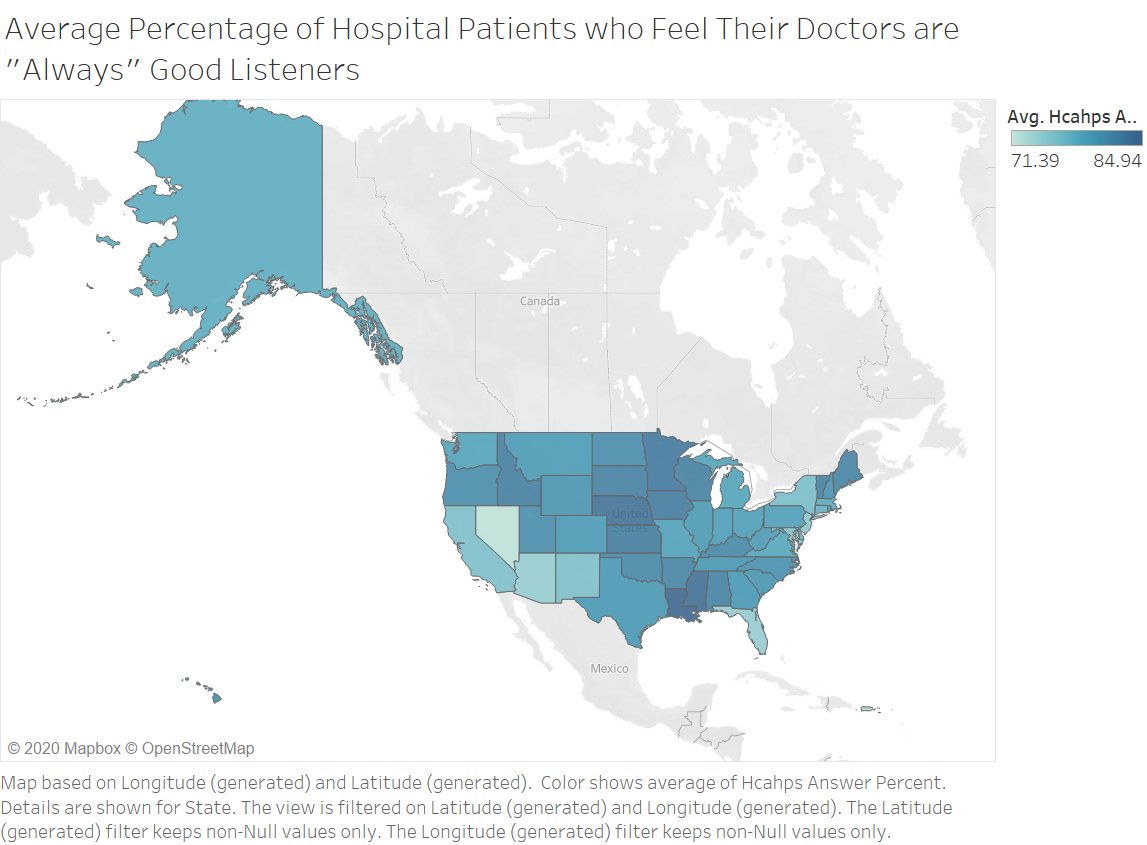

Here we can see patterns a bit more clearly. The first thing that was noticed was that states in the southwest region of states in the mainland United States tend to have a less percentage of hospital patients say that their doctor "Always" is a good listener. This could be due to a multitude of reasons and should be further analyzed at various levels per state (e.g. do hospitals in a lower median income or education completion area get rated lower in communication than those in wealthier areas with a higher education completion rate). 

That being said, doctors are not the only people hospital patients may interact with. We also have data available regarding the listening skills of nurses. We should take a look at that as well.

In [13]:
hp_nurse_listen_always = hp_comm_clean[hp_comm_clean["hcahps_measure_id"]=="H_NURSE_LISTEN_A_P"]
hp_nurse_listen_always_pv = hp_nurse_listen_always.pivot_table(values = "hcahps_answer_percent", 
                                                                index = "state", 
                                                                margins = True,
                                                               aggfunc = np.mean)
#hp_nurse_listen_always_pv.to_csv("hp_nurse_listen_usually.csv")

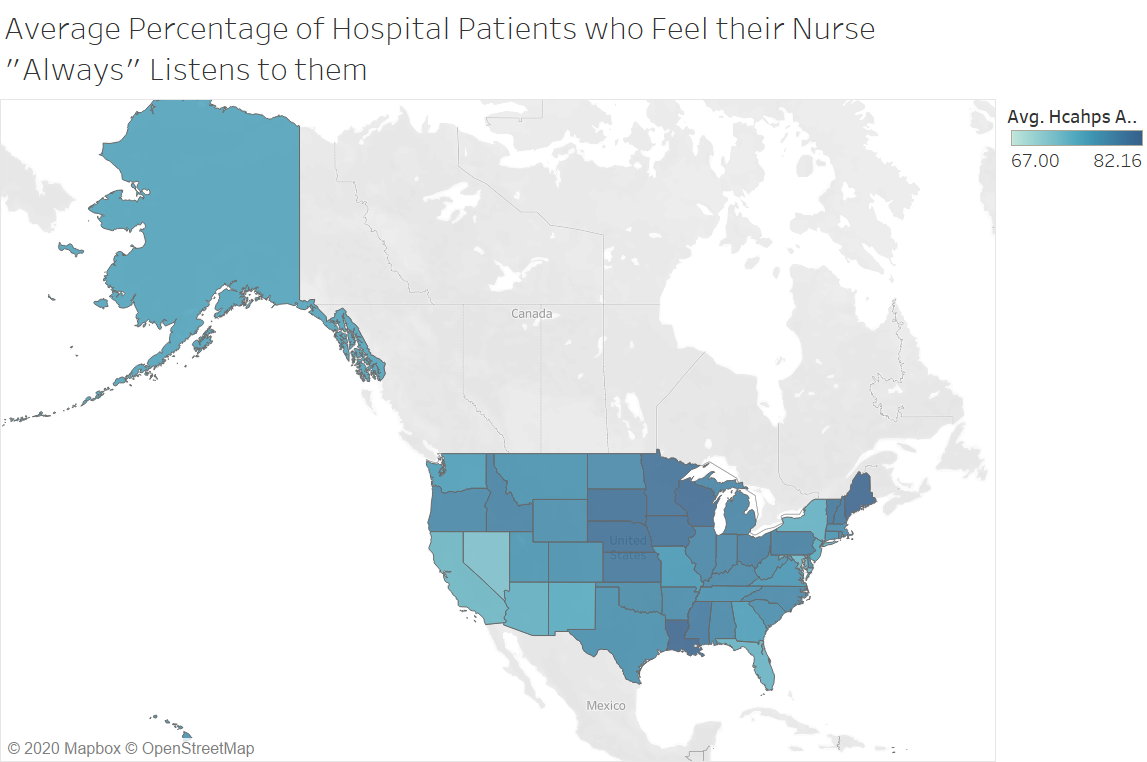

Here we see a similar pattern with what we saw when we looked at doctor's listening skills. It appears that states in the southwest region of the mainland United States tend to average a bit lower then other states. 

Lets bring back the map about doctors and do a side to side comparison. Both have a scale of 67-85 percent so that different scales can't influence the shade of color for a state.
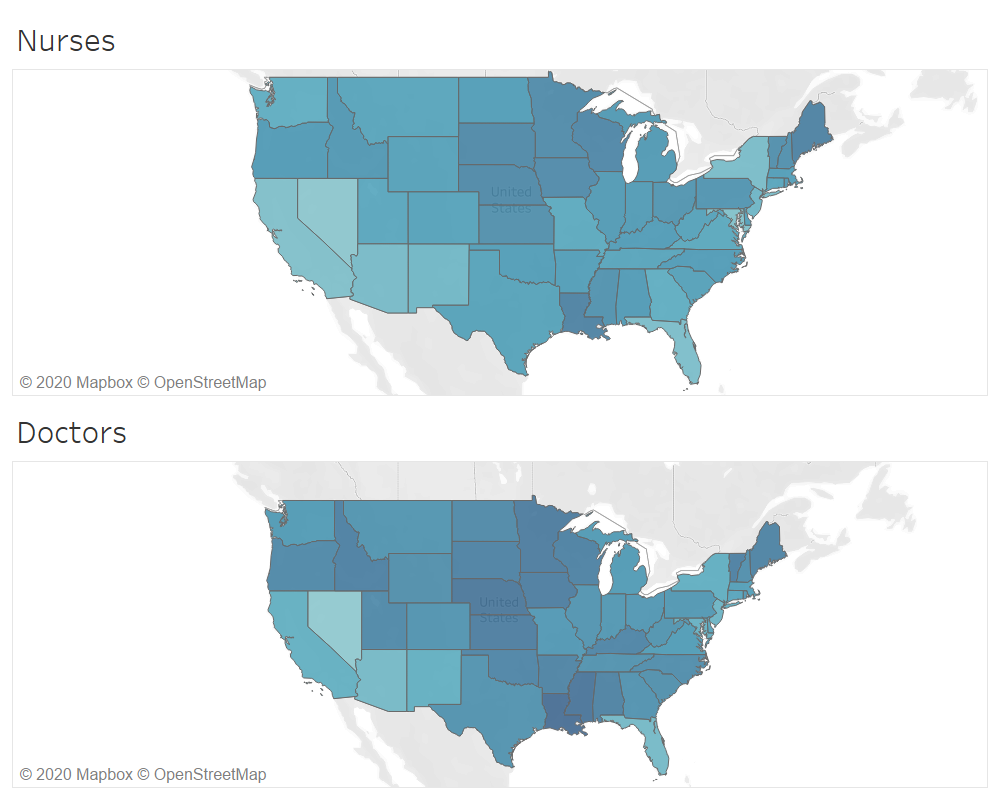

Through the shade of color, we are able to see that in general, hospital patients may see their doctor as "Always" a good listener compared to nurses as the map of doctors tends to have a darker shade overall.

## Exploring More Questions: Scoring Communication Skills by State

In the HCAHPS survey, Communication is not evaluated solely by listening skills, there are other questions that encompass the concept of communication as seen below.
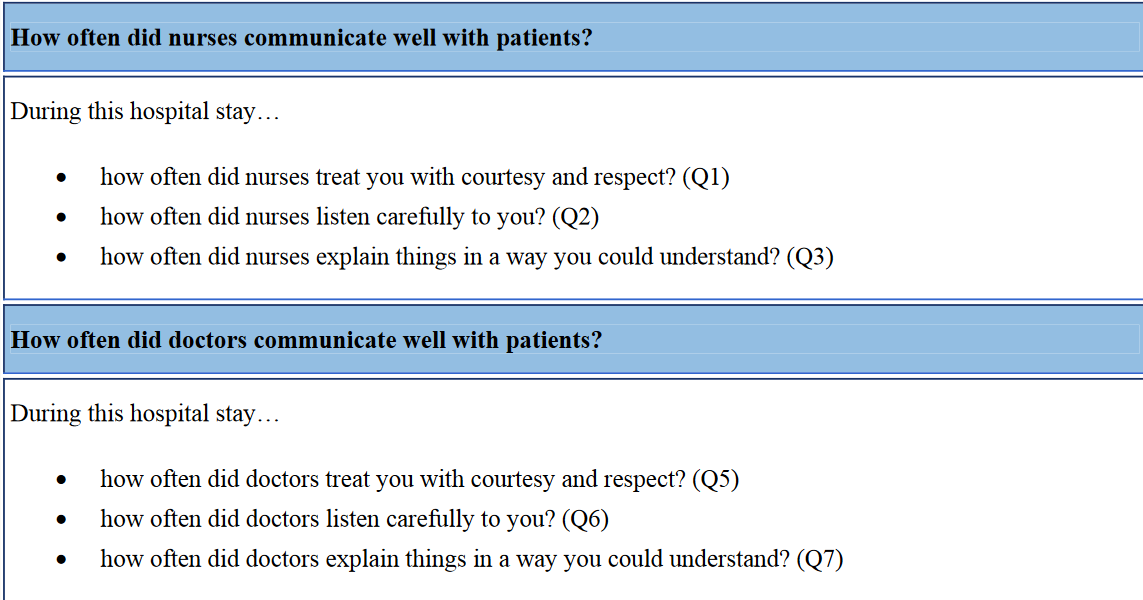
There are 6 questions total, 3 for doctors and 3 for nurses. Along with listening, explanation and respectfulness skills also fall under the the category of communication. What we are going to try to do is give a state a score based on these 6 questions. 

We are solely going to use the "Always" option to score our states. First, we will gather the median percentage of "Always" answers of every state as well as the median of "Always" Answers in the country as a whole. 

For each of the questions, if the state median of "Always" answers is higher than the national median, we will give the state one point for that question. The maximum number of points a state can receive is 6.

Here is a visual representation of our scoring method. 
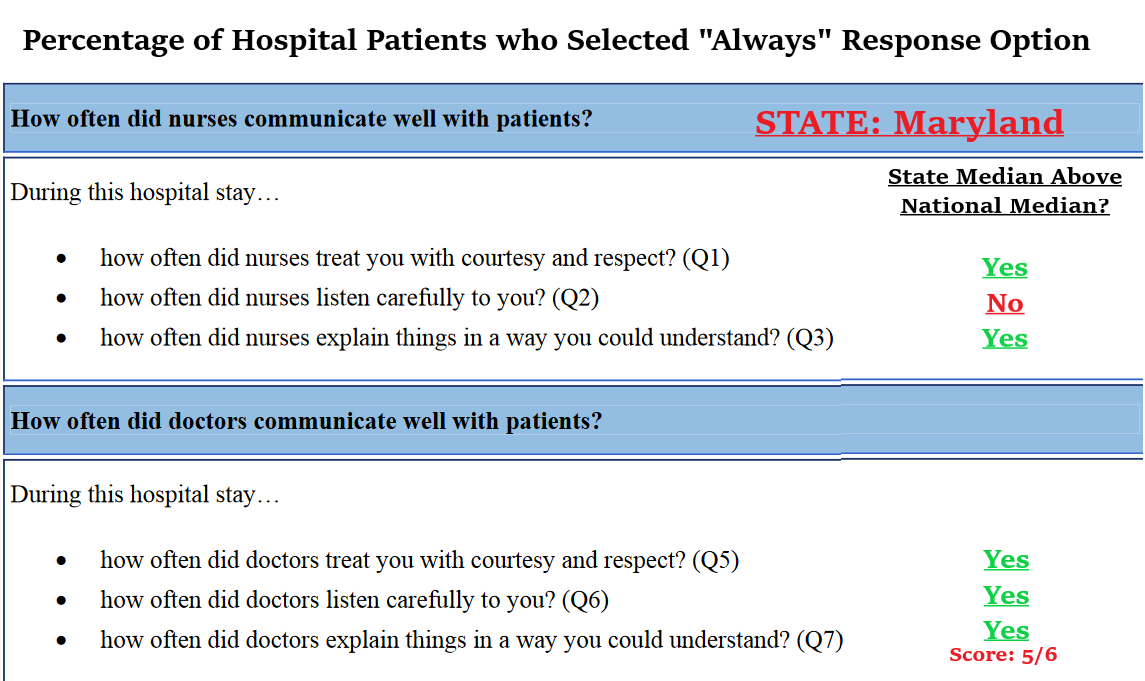

So lets Begin!

First, lets trim our dataframe to only have rows with hcahps_measure_id that correspond to the six questions' "Always" option.

In [52]:
ids = ["H_NURSE_LISTEN_A_P","H_DOCTOR_LISTEN_A_P","H_NURSE_RESPECT_A_P",
       "H_DOCTOR_RESPECT_A_P", "H_NURSE_EXPLAIN_A_P","H_DOCTOR_EXPLAIN_A_P"]

hp_comm_id = hp_comm_clean[hp_comm_clean["hcahps_measure_id"].isin(ids)]

hp_comm_pivot = hp_comm_id.pivot_table(index = "state",
                                       columns = "hcahps_measure_id",
                                 values = "hcahps_answer_percent",
                                       margins = True,
                                 aggfunc = np.median)
hp_comm_pivot = hp_comm_pivot.drop(columns = "All")

hp_comm_pivot.head()


hcahps_measure_id,H_DOCTOR_EXPLAIN_A_P,H_DOCTOR_LISTEN_A_P,H_DOCTOR_RESPECT_A_P,H_NURSE_EXPLAIN_A_P,H_NURSE_LISTEN_A_P,H_NURSE_RESPECT_A_P
state,,,,,,
AK,75.0,77.0,86.0,76.0,75.0,87.0
AL,79.5,81.5,89.0,77.5,78.0,86.0
AR,78.0,81.0,89.0,76.5,78.0,86.5
AZ,72.0,75.0,84.0,74.0,73.0,85.0
CA,73.0,76.0,85.0,73.0,73.0,84.0


In [55]:
hp_comm_pivot.tail()

hcahps_measure_id,H_DOCTOR_EXPLAIN_A_P,H_DOCTOR_LISTEN_A_P,H_DOCTOR_RESPECT_A_P,H_NURSE_EXPLAIN_A_P,H_NURSE_LISTEN_A_P,H_NURSE_RESPECT_A_P
state,,,,,,
WA,75.0,79.0,88.0,74.5,75.0,87.0
WI,78.0,82.0,89.0,79.0,81.0,89.0
WV,78.0,80.0,86.5,76.0,77.0,87.5
WY,77.0,81.0,88.0,75.0,78.0,87.0
All,76.0,79.0,87.0,76.0,77.0,87.0


In [82]:
# Create a new function to compare state median to all.

def comparetoall(element, all_value):
    if element > all_value:
        return 1
    if element == all_value:
        return .5
    else:
        return 0


In [102]:
#lower column headers
hp_comm_pivot.columns = map(str.lower, hp_comm_pivot.columns)

#Create New columns with score by category
hp_comm_pivot["doctor_listen_score"]= hp_comm_pivot["h_doctor_listen_a_p"].apply(comparetoall, all_value = 79)
hp_comm_pivot["doctor_explain_score"] = hp_comm_pivot["h_doctor_explain_a_p"].apply(comparetoall, all_value = 76)
hp_comm_pivot["doctor_respect_score"] = hp_comm_pivot["h_doctor_respect_a_p"].apply(comparetoall, all_value = 87)
hp_comm_pivot["nurse_listen_score"]= hp_comm_pivot["h_nurse_listen_a_p"].apply(comparetoall, all_value = 77)
hp_comm_pivot["nurse_explain_score"] = hp_comm_pivot["h_nurse_explain_a_p"].apply(comparetoall, all_value = 76)
hp_comm_pivot["nurse_respect_score"] = hp_comm_pivot["h_nurse_respect_a_p"].apply(comparetoall, all_value = 87)

#create total_score column 
hp_comm_pivot["total_score"] = hp_comm_pivot["nurse_respect_score"]+ hp_comm_pivot["nurse_explain_score"] + hp_comm_pivot["nurse_listen_score"] + hp_comm_pivot["doctor_respect_score"]+ hp_comm_pivot["doctor_explain_score"] + hp_comm_pivot["doctor_listen_score"]

hp_comm_pivot.tail()

,h_doctor_explain_a_p,h_doctor_listen_a_p,h_doctor_respect_a_p,h_nurse_explain_a_p,h_nurse_listen_a_p,h_nurse_respect_a_p,doctor_listen_score,doctor_explain_score,doctor_respect_score,nurse_listen_score,nurse_explain_score,nurse_respect_score,total_score
state,,,,,,,,,,,,,
WA,75.0,79.0,88.0,74.5,75.0,87.0,0.5,0.0,1.0,0.0,0.0,0.5,2.0
WI,78.0,82.0,89.0,79.0,81.0,89.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0
WV,78.0,80.0,86.5,76.0,77.0,87.5,1.0,1.0,0.0,0.5,0.5,1.0,4.0
WY,77.0,81.0,88.0,75.0,78.0,87.0,1.0,1.0,1.0,1.0,0.0,0.5,4.5
All,76.0,79.0,87.0,76.0,77.0,87.0,0.5,0.5,0.5,0.5,0.5,0.5,3.0


We now have our data frame with state scores! Lets visualize it. 

In [99]:
hp_comm_pivot.to_csv("hospital_comm_score_by_state.csv")


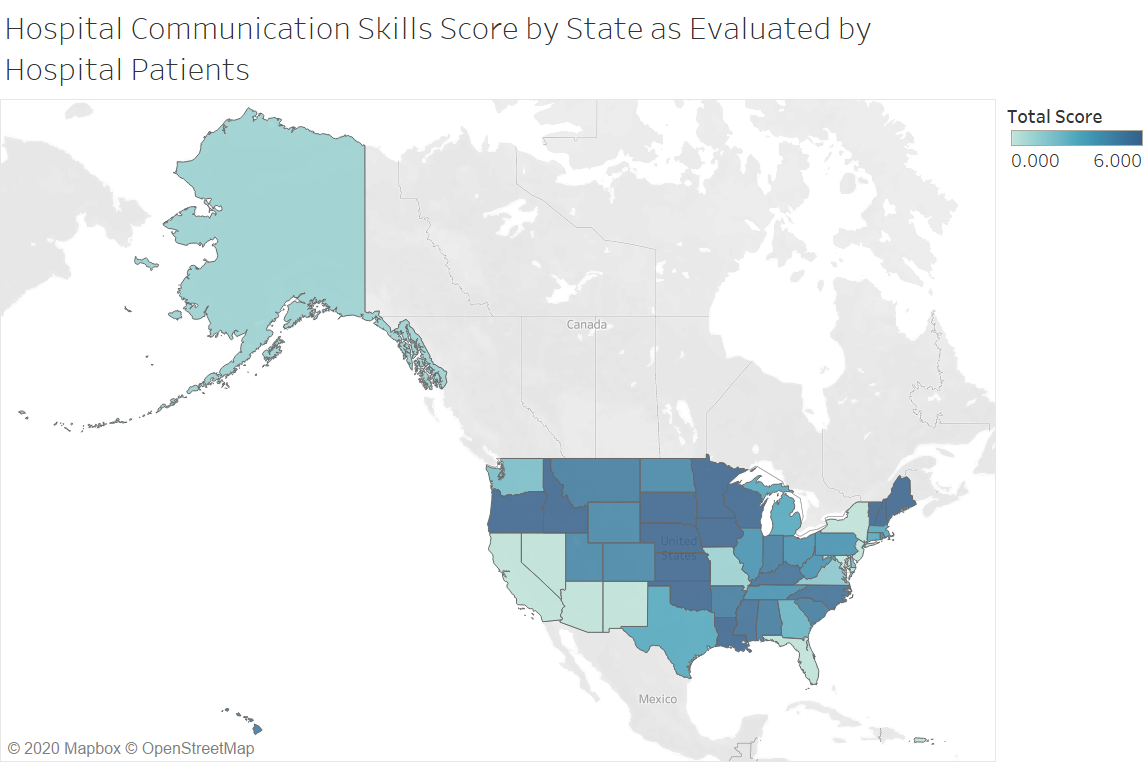

In [112]:
scores = hp_comm_pivot.drop("All")
scores = scores["total_score"].value_counts()

In [106]:
print(scores)

6.0    13
0.0    10
5.0     6
4.0     5
3.0     5
4.5     5
5.5     3
2.0     2
1.0     2
0.5     1
1.5     1
2.5     1
Name: total_score, dtype: int64
